# Integrated Intelligent Systems: Module 1 - Foundations (Tutorial)

This notebook introduces the fundamental components, challenges, and definitions central to designing and implementing Cognition-Enabled Robot Agents.

## Part 1: Concepts, Definitions and the Closed-Loop System

### 1.1 Intelligent Agents vs. Rational Agents

In [5]:
from IPython.display import display, HTML,IFrame
display(IFrame('rationality_against_intelligence.html', width=1000, height=1350))

### 1.2 Components of a Cognition-Enabled Robot Agent

Building an intelligent robot requires orchestrating multiple complex software components in a continuous loop.

In [8]:
from IPython.display import display, HTML,IFrame
display(IFrame('function_grounding.html', width=1500, height=1750))

### 1.2 Challenges of a Cognition-Enabled Robot Agent

Each of these components come with specific challenges.

In [9]:
from IPython.display import display, HTML,IFrame
display(IFrame('foundations_tutorial.html', width=1000, height=1000))

### 1.3 What is Meant by Integrated?

In [12]:
from IPython.display import display, HTML,IFrame
display(IFrame('integration_principles.html', width=1000, height=1300))

# Part 2: Hands-On

## 2.1 Simulating Sensor Noise and State Estimation

In a real robot, sensor data is never perfectly accurate. We model this uncertainty using Probabilistic State Estimation, often assuming Gaussian (Normal) noise.

The robot's belief about the world is the estimated mean, and its uncertainty is the estimated standard deviation of the noisy readings.

---

### **Questions**

1. **Effect of Noise:**  
   - How does increasing `NOISE_STD_DEV` affect the estimated mean and the standard deviation?  
   - What does this tell you about the reliability of the robot’s belief?

2. **Number of Readings:**  
   - Reduce `NUM_READINGS` to 10 or 50. How does the estimated mean and uncertainty change?  
   - Why does increasing the number of readings improve the robot’s belief?

True Value: 2.50 m
Estimated Mean (Robot's Belief State): 2.50 m
Estimated Standard Deviation (Uncertainty): 0.10 m


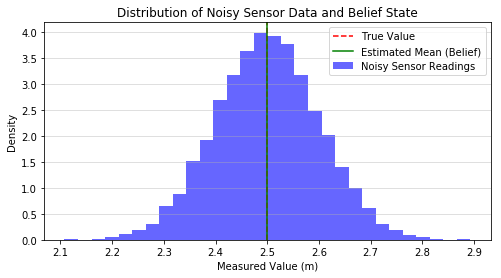

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# The actual, true value the robot is sensing (e.g., distance in meters)
TRUE_DISTANCE = 2.5 

# The standard deviation (sigma) representing the sensor's noise level
# (A lower value means a better, less noisy sensor)
NOISE_STD_DEV = 0.1 

# Number of readings taken
NUM_READINGS = 10000

# Set a seed for reproducibility
np.random.seed(42) 

# Simulate sensor readings by adding Gaussian noise around the TRUE_DISTANCE
readings = np.random.normal(loc=TRUE_DISTANCE, scale=NOISE_STD_DEV, size=NUM_READINGS)

# Calculate the robot's belief (estimated state)
estimated_mean = np.mean(readings)
estimated_std = np.std(readings)

print("True Value: {:.2f} m".format(TRUE_DISTANCE))
print("Estimated Mean (Robot's Belief State): {:.2f} m".format(estimated_mean))
print("Estimated Standard Deviation (Uncertainty): {:.2f} m".format(estimated_std))

# Plotting the distribution of sensor readings
plt.figure(figsize=(8, 4))
plt.hist(readings, bins=30, density=True, alpha=0.6, color='b', label='Noisy Sensor Readings')
plt.axvline(TRUE_DISTANCE, color='r', linestyle='--', linewidth=1.5, label='True Value')
plt.axvline(estimated_mean, color='g', linestyle='-', linewidth=1.5, label='Estimated Mean (Belief)')
plt.title('Distribution of Noisy Sensor Data and Belief State')
plt.xlabel('Measured Value (m)')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()

## 2.2 Conceptualizing the Sense-Reason-Plan-Act Loop

The following code conceptually illustrates how the robot uses its Belief State (confidence derived from State Estimation) to decide its next action, forming the closed loop.

---

1. **Belief State Calculation**

  - How is the robot’s belief state updated in response to sensor readings?  
  
  - Given an initial belief of `0.5` and a noisy sensor reading, calculate the new belief if the drop factor is `0.7`. What would it be if the sensor is clear and the increase factor is `1.2`?  



2. **Decision Thresholds**

  - How do the thresholds for belief (`<0.3`, `<0.8`, `>=0.8`) determine the robot’s next action?  

  - If the robot has a belief of `0.65`, which action will it choose? Why?  



3. **Goal Completion**

  - How does the robot move from one goal to the next?  

  - After executing the first goal successfully, what changes occur in `current_goal` and `goal_list`?  



4. **Impact of Sensor Noise**

  - What happens if the sensor repeatedly reports noisy readings?  

  - Describe a scenario in which a goal might **never be executed** due to persistent low belief. What part of the program handles this?  



5. **Probabilistic vs Deterministic Behavior**

  - The program uses random factors in belief updates. How does this affect execution?  

  - Simulate two runs with identical initial conditions. How could the robot’s actions differ? Why is this important for understanding **rational agents under uncertainty**?  


In [18]:
import random

# --- Conceptual Integrated Robot Agent for Python 2 ---
class IntegratedRobotAgent(object):
    """Simplified cognitive architecture: Sense-Reason-Plan-Act loop with multiple goals."""
    def __init__(self, goal_list):
        self.KB = {'goal_list': list(goal_list), 'current_goal': goal_list[0] if goal_list else None}
        self.belief_state = 0.5  # Initial confidence/probability
    
    def update_belief(self, Z_data):
        """Update belief based on sensor reliability."""
        if Z_data.get('is_noisy', False) or Z_data.get('critical_error', False):
            # Low confidence/high uncertainty
            drop_factor = random.uniform(0.6, 0.85)
            return self.belief_state * drop_factor
        else:
            # High confidence/alignment
            increase_factor = random.uniform(1.05, 1.25)
            return min(1.0, self.belief_state * increase_factor + 0.05)
    
    def action_selection(self, current_belief):
        """Choose next action based on belief."""
        if current_belief < 0.3:
            return "EMERGENCY_STOP"
        elif current_belief < 0.8:
            return "Re_sense_Environment"
        else:
            goal = self.KB['current_goal']
            if goal:
                # Python 2 string formatting
                return "Execute_Plan_for_%s_Step_1" % goal
            else:
                return "No_Goal_Left"
    
    def sense_reason_plan_act(self, raw_sensor_data):
        """One iteration of the SRPA loop."""
        # 1. Sense
        Z = raw_sensor_data
        
        # 2. Reason
        self.belief_state = self.update_belief(Z)
        
        # 3. Plan
        plan_action = self.action_selection(self.belief_state)
        
        # 4. Act
        return plan_action
    
    def next_goal(self):
        """Move to the next goal if available."""
        if self.KB['goal_list']:
            self.KB['goal_list'].pop(0)
            self.KB['current_goal'] = self.KB['goal_list'][0] if self.KB['goal_list'] else None

# --- Mini Robot Adventure Tutorial ---
print "=== Welcome to the Mini Robot Adventure ===\n"

robot = IntegratedRobotAgent(goal_list=['Popcorn', 'Drink', 'Stove'])

for step in range(10):
    if not robot.KB['current_goal']:
        print "\nAll goals completed! Robot mission accomplished."
        break
    
    # Simulate sensor readings
    noisy = random.random() < 0.3       # 30% chance of noise
    critical = random.random() < 0.1    # 10% chance of critical error
    sensor_data = {
        'distance': round(random.uniform(0.5, 5.0), 2),
        'is_noisy': noisy,
        'critical_error': critical
    }
    
    # Execute SRPA loop
    action = robot.sense_reason_plan_act(sensor_data)
    
    # Print step summary (Python 2)
    print "Step %d: Goal=%s, SensorData=%s" % (step+1, robot.KB['current_goal'], sensor_data)
    print "         Belief=%.2f, Action=%s\n" % (robot.belief_state, action)
    
    # If goal is executed successfully, move to next goal
    if action.startswith("Execute_Plan"):
        robot.next_goal()


=== Welcome to the Mini Robot Adventure ===

Step 1: Goal=Popcorn, SensorData={'distance': 3.5, 'critical_error': False, 'is_noisy': True}
         Belief=0.40, Action=Re_sense_Environment

Step 2: Goal=Popcorn, SensorData={'distance': 3.27, 'critical_error': False, 'is_noisy': False}
         Belief=0.49, Action=Re_sense_Environment

Step 3: Goal=Popcorn, SensorData={'distance': 4.13, 'critical_error': False, 'is_noisy': False}
         Belief=0.59, Action=Re_sense_Environment

Step 4: Goal=Popcorn, SensorData={'distance': 1.78, 'critical_error': False, 'is_noisy': False}
         Belief=0.75, Action=Re_sense_Environment

Step 5: Goal=Popcorn, SensorData={'distance': 3.5, 'critical_error': False, 'is_noisy': False}
         Belief=0.93, Action=Execute_Plan_for_Popcorn_Step_1

Step 6: Goal=Drink, SensorData={'distance': 2.12, 'critical_error': False, 'is_noisy': False}
         Belief=1.00, Action=Execute_Plan_for_Drink_Step_1

Step 7: Goal=Stove, SensorData={'distance': 3.43, 'critica

### 2.3 Advanced Programming Question: Extend the Mini Robot Adventure


Currently, the robot executes goals sequentially and updates its belief based on simple probabilistic factors. Your task is to **enhance the program** to make it more realistic and interactive.

---  

1. **Add a Cautious Re-perceive for Low Belief:**  
   - Modify the `action_selection` method so that if belief is very low (`<0.3`), the robot can attempt a **limited, cautious re-sensing** instead of immediately performing `EMERGENCY_STOP`.  
   - Ensure that repeated attempts eventually trigger a stop if belief remains too low.  

2. **Implement Dynamic Goal Prioritization:**  
   - Modify the program so that the robot can **reorder its goals** based on sensor distance or other criteria, rather than always executing sequentially.  

4. **Optional Challenge – Probabilistic Goal Success:**  
   - Add a **success probability** for each goal. Even if the belief is high, the goal may fail randomly.  
   - Update the program to **retry failed goals** until completed or until a maximum number of attempts is reached.  
